# Question 1


In [13]:
txt = input()
n = int(input())
e = int(input())

if e>n:
  raise Exception("No. of errors more than no. of repetitions")

import random
import string
rand = random.Random()

words_str = "".join(chr(x) for x in range(65,123) if 64<x<91 or 96<x<123 )
choice_set = list(x for x in range(1,n+1))
txt_length = len(txt)
# error_set = set(x for x in range(0,txt_length))
letter_pos_set = list(x for x in range(0,txt_length) if txt[x] != " ")
answers={x:x for x in range(1,n+1)}
cnt_e = e
t_f = True if len(letter_pos_set) > e else False
for i in range(n):
  if cnt_e == 0:
    for x in answers:
      if answers[x] == x:
        answers[x] = txt
    break
  curr_no = rand.choice(choice_set)
  if cnt_e > 0:
    pos = rand.choice(letter_pos_set)
    t_new = txt[:pos] + rand.choice(words_str) + txt[pos+1:]
    answers[curr_no] = t_new
    cnt_e -= 1
    choice_set.remove(curr_no)
    if t_f:
      letter_pos_set.remove(pos)

# print((zip(answers.keys(), answers.values())))
for v in answers:
  print(v," "+answers[v])



1  Hello Woqld Python!
2  Hello World Python!
3  Hello World Python!
4  Hello World Python!
5  Hello World Python!
6  Hello World Pytqon!
7  Hello Worlc Python!
8  Hello World Python!
9  oello World Python!
10  Hello World Python!


# Question 2

In [15]:
class Node:
  def __init__(self, e, p, n):
    self.val = e
    self.prev = p
    self.next = n

  def getElement(self):
    return self.val
  def getNext(self):
    return self.next
  def getPrev(self):
    return self.prev

In [26]:
class DoublyLinkedList:


  def __init__(self) -> None:
    self._head = Node(None, None, None)
    self._tail = Node(None, self._head, None)
    self._head.next = self._tail
    # self._tail.prev = self._head
    self._size = 0

  def __len__(self):
    return self._size

  def isEmpty(self):
    return self._size == 0

  def addBetween(self, val, prev_val, next_val):
    value = Node(val, prev_val, next_val)
    prev_val.next = value
    next_val.prev = value
    self._size += 1
    return value

  def first(self):
        if self.isEmpty():
          return None
        return self._head.getNext().getElement();

  def firstNode(self):
        if self.isEmpty():
          return None
        return self._head.getNext()

  def last(self):
        if self.isEmpty():
          return None
        return self._tail.getPrev().getElement()

  def lastNode(self):
        if self.isEmpty():
          return None
        return self._tail.getPrev()

  def addFirst(self, e):
        self.addBetween(e,self._head,self._head.getNext());

  def addLast(self, e):
        self.addBetween(e,self._tail.getPrev(),self._tail)

  def popNode(self, node):
    pre = node.prev
    nex = node.next
    pre.next = nex
    nex.prev = pre
    self._size -= 1
    elem = node.getElement()
    node.prev = node.next = node.val = None
    return elem



In [35]:
class StudentRecord:
  
  def __init__(self):
    self.dl = DoublyLinkedList()

  def insert_record(self, v):
    new_v = v.split()
    # i_node = Node(e=v, p=None, n=None)
    if len(self.dl) == 0:
      self.dl.addFirst(v)
      print(v)
    else:
      a =self.dl.firstNode()
      while a.next != None:
        s1 = a.getElement()
        s2 = a.next.getElement() if a.next.getElement() != None else "00"
        n1 = int(s1[len(s1)-2:])
        n2 = int(s2[len(s2)-2:])
        nv = int(new_v[len(new_v)-1])
        if nv<n1:
          self.dl.addFirst(v)
          self.print_func()
          break
        if n2 != 0:
          if n1>=nv and nv<=n2:
            self.dl.addBetween(v, a, a.next)
            self.print_func()
            break
        elif n2 == 0:
          self.dl.addLast(v)
          self.print_func()
          break
            
        a = a.getNext()

  def print_func(self):
    cnt = 0
    b = self.dl.firstNode()
    while b.next != None and cnt<10:
      print(b.getElement())
      b = b.next
      cnt+=1
        
  


sr = StudentRecord()

x = input()
is_true = True
while is_true:
  if x == "0":
    is_true = False
    break
  else:
    sr.insert_record(x[2:])
    x = input()


Rama 10
Rama 10
Raam 15
Srikar 1
Rama 10
Raam 15
Srikar 1
Rama 10
Raam 15
Srisir 27


# Question 3


In [2]:
import time
import random
import subprocess

def rand_no_gen():
  while True:
    yield random.random()


def rand_mat_gen(n):
  rgn = rand_no_gen()
  rand =random.Random()
  mat = [[0 for x in range(n)] for x in range(n)]
  for i in range(0, n*n):
    # print("1", i//n, "2", i%n)
    x = rand.random()
    mat[i//n][i%n] = next(rgn)
  return mat

def mat_mul (x, y):
  # for two nxn matrices
  n = len(x)
  ans_mat = [[0 for x in range(n)] for x in range(n)]
  for i in range(0,n):
    for j in range(0,n):
      ans_mat[i][j] = 0
      for k in range(0,n):
        ans_mat[i][j] += x[i][k] * y[k][j]
        # print(ans_mat)
  return ans_mat






In [12]:
times = []

for i in range(5,251, 5):
    x = rand_mat_gen(i)
    y = rand_mat_gen(i)
    st = time.time()
    m = mat_mul(x,y)
    end = time.time()
    times.append([i, end-st])

with open("script.gnuplot", "w") as sc:
        sc.write("# script.gnuplot \n\n")
        sc.write("set title 'Matrix Data'\n")
        sc.write('set xlabel "n" \nset ylabel "t(n)" \nplot "points.data"')

with open("points.data", "w") as pt:
        pt.write("# points.data \n\n")
        for t in times:
            pt.write(str(t[0])+" "+str(t[1]))
            pt.write("\n")
            
# in order to execute go to the directory and after installing gnuplot, 

In order to execute go to the directory and after installing gnuplot, type the following in terminal
```shell
$ gnuplot -p script.gnuplot
```
The following is the output for matrices ranging from N=5 to N=250 (although it was asked to plot from N=5 to N=50)

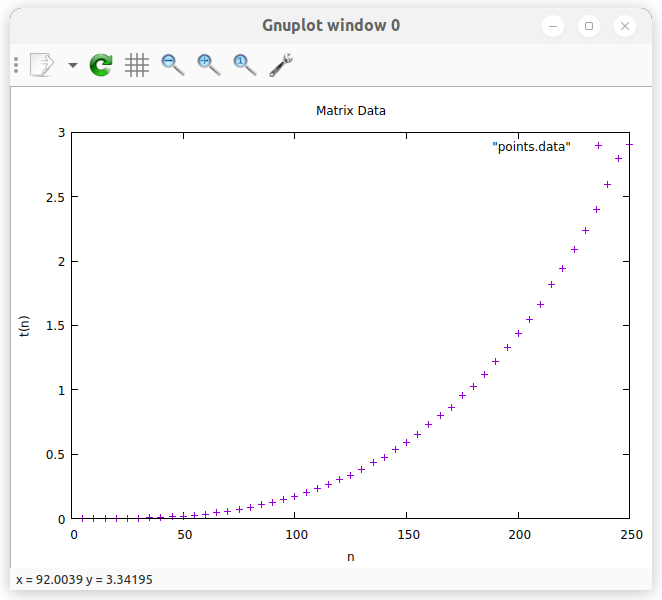

As my `py-gnuplot` was not working, I had to use gnuplot from terminal to plot this
